<a href="https://colab.research.google.com/github/knc6/jarvis/blob/master/jarvis/colab/jarvis_dft_explore_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring some data in the JARVIS-DFT database 

## Contents:
- Installing jarvis-tools package
- Importing JARVIS-DFT metadata as a python object
- Data-size and content-description
- Visualizing range of data, Note: ML good for interpolation  mainly
- OptB88vdW vs TBmBJ gap, right physics for right predictions
- Python object to pandas dataframe


**First install jarvis-tools using pip install or any of the installation methods give in https://github.com/usnistgov/jarvis/blob/master/README.rst . Then, scroll down and click "RESTART RUNTIME" if you are using colab**

In [0]:
!pip install -U jarvis-tools

## Now, let's get JARVIS's 3D and 2D-materials DFT datasets. These data were obatined after thousands of VASP DFT calculations. 

For more information go to 

- the JARVIS-Homepage: https://jarvis.nist.gov

- JARVIS-DFT page: https://www.ctcms.nist.gov/~knc6/JVASP.html 


## It takes quite a lot of work to make such databases. Please cite us if you use the databases/tools. For citations, visit our publications page.

- JARVIS-Publications: https://www.ctcms.nist.gov/~knc6/pubs.html 


In [0]:
import json, math, os

# https://pypi.org/project/monty/
from monty.serialization import loadfn, MontyDecoder, MontyEncoder

# https://matplotlib.org/
import matplotlib.pyplot as plt
plt.switch_backend('agg')

# https://www.numpy.org/
import numpy as np

# https://pandas.pydata.org/
import pandas as pd

# https://docs.python.org/3/library/pprint.html
import pprint

from jarvis.db.static.explore_db import get_3d_dataset,get_2d_dataset

dat_3d = get_3d_dataset() 
#dat_3d = loadfn('jdft_3d-6-6-2019.json',cls=MontyDecoder)
dat_2d = get_2d_dataset()
#dat_2d = loadfn('jdft_2d-6-6-2019.json',cls=MontyDecoder) 

## Let's see the dataset-size for the 3D and 2D materials. These are like python arrays and each of the array elements have python-dictionaries aka key-value pairs.

### Exercise 1: size of the data

In [3]:
"""
print ('Total 3D-materials:',len(dat___))
print ('Total monolayer/2D materials:',len(dat___))
"""

"\nprint ('Total 3D-materials:',len(dat___))\nprint ('Total monolayer/2D materials:',len(dat___))\n"

In [4]:
for key,value in dat_3d[0].items():
    print(key)

gv
mpid
encut
icsd
form_enp
final_str
mbj_gap
fin_en
jid
elastic
incar
kpoints
kp_leng
epsz
epsx
epsy
eff_mass
op_gap
initial_str
magmom
mepsz
mepsx
mepsy
kv
spillage


### Exercise 2: print the variable type of the values in the dictionary

In [5]:
"""
for key,value in dat_3d[0].items():
    print(key,type(__))
"""

'\nfor key,value in dat_3d[0].items():\n    print(key,type(__))\n'

In [6]:
for key,vale in dat_2d[0].items():
    print(key)

magmom
fin_en
op_gap
final_str
mpid
exfoliation_en
elastic
incar
kpoints
mepsz
jid
mepsx
mepsy
phi
initial_str
form_enp
epsx
epsy
epsz
mbj_gap


In [7]:
for key in dat_2d[0]['phi']:
    print(key)

nelect
phi
scf_vbm
scf_cbm
Ef
scf_gap
avg_max
scf_dir


## Each element in the data is a key-value pair based dictionary for a compound and the keys are listed below:

| key | description | type | units | 
|------|--------| - | - |
|**form_enp** | Formation energy per atom, a compound will if it has negative form_enp | float | eV/atom |
|**op_gap**| Bandgap computed with the OptB88vdW functional, if equal or close to zero then a materials is metal, else semiconductor | float | eV |
|**mbj_gap**| Bandgap computed with the TBmBJ potential | float | eV |
|**kv**| Voigt bulk modulus, stiffness of a compound | float | GPa|
|**gv**| Voigt shear modulus| float| GPa|
|**elastic**| Comma-separated list of 6x6 elastic tensor values | str | GPa?|
|**epsx** |   Static dielctric function value in x-direction based on OptB88vdW, a measure of light-matter interaction | float |unitless |
|**mepsx**| Static dielctric function value in x-direction based on TBmBJ | float |unitless |
|**magmom** | Magnetic moment, close or equal to zero for non-magnetic materials. Values from both OUTCAR and OSZICAR listed | dict | Bohr magneton| 
|**kp_len** | Kpoint automatic line density obtained after automatic convergence (substract 25 because 5 extra points taken during convergence) | float | Angstrom|
|**encut**  | Plane wave cut-off value obtained after automatic convergence | float | eV|
|**exfoliation_en** | exfoliation energy, whether a 2D materials can be "scotch-taped", generally <200 | float | meV/atom|
|**phi**  | 2D work-function related values | dict | varies|
|**final_str** | final structure after relaxation with OptB88vdW |pymatgen.Structure||
|**eff_mass** | effective mass with BoltzTrap at 300K | float | mass of an electron|
|**spillage** | spin-orbit spillage as measure of band-inversion, for topological materials generally >0.5 | float | charge|

 - - -
 

Note that units can be different for 3D and 2D materials because of surface nature of 2D

Here 'na' for any of the values signifies non-available data. This is because some of the properties might not have been computed yet.




## Let's examine some of the avilable data for 3D and their sizes

In [8]:
# List the bulk property keys to examine
keys = ['gv', 'kv', 'fin_en', 'op_gap', 'mbj_gap', 'magmom', 'epsx', 'epsy',
        'epsz', 'mepsx', 'mepsy', 'mepsz', 'eff_mass', 'form_enp', 'spillage']

# Build dictionary of value lists
info = {}
for dataset in dat_3d:
    for key in keys:
    
        # Append non-empty values
        if dataset[key] != 'na' and dataset[key] != {}:
            info.setdefault(key, []).append(dataset['jid'])

for key, values in info.items():
    print (key, len(values))

fin_en 32486
magmom 30787
eff_mass 32486
form_enp 32486
gv 13492
kv 13492
op_gap 29672
mbj_gap 9089
epsx 29672
epsy 29672
epsz 29672
mepsx 14410
mepsy 14410
mepsz 14410
spillage 4648


## Let's examine some of the available data for 2D materials


In [9]:
# List the bulk property keys to examine
keys = ['phi', 'magmom', 'fin_en', 'op_gap',  'exfoliation_en', 'elastic', 
        'mepsz', 'mepsx', 'mepsy', 'form_enp', 'epsx', 'epsy', 'epsz',
        'mbj_gap']

# Build dictionary of value lists
info = {}
for dataset in dat_2d:
    for key in keys:
    
        # Append non-empty values
        if dataset[key] != 'na' and dataset[key] != {}:
            info.setdefault(key, []).append(dataset['jid'])

for key, values in info.items():
    print (key, len(values))

phi 754
magmom 754
fin_en 754
exfoliation_en 754
form_enp 754
op_gap 623
elastic 343
epsx 623
epsy 623
epsz 623
mepsz 167
mepsx 167
mepsy 167
mbj_gap 128


## Query example: We can use several constraints to filter/screen/computationally-discover materials based on material-properties or their combinations, chemical formula etc.
## Here, for example, let's find 5 materials with spillage>0.5 and prototype 'A2B3' and bandgap>=0.05,<2.0

In [10]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

forms=[]
# Loop over each dataset
for dataset in dat_3d:
    
    # Extract final structure and composition info
    structure = dataset['final_str']
    ano_formula = structure.composition.anonymized_formula
    formula = structure.composition.reduced_formula

    # Get gap value and spillage
    gap = dataset['op_gap'] # or dataset['scf_gap']
    spillage = dataset['spillage']

    # Find values matching criterion
    if spillage != 'na' and spillage >= 0.5 \
    and gap !='na' and gap >= 0.05 and gap < 2.0 \
    and ano_formula == 'A2B3' and formula not in forms :

        # Append formula and space group symbol to list
        spg = SpacegroupAnalyzer(structure).get_space_group_symbol()
        val = [formula, spg]
        forms.append(val)

        # Stop after finding 5 matches
        if len(forms)==5:
            break
      
print (forms)

[['Bi2Se3', 'Pnma'], ['Bi2Te3', 'R-3m'], ['Ca3Sb2', 'Pm-3m'], ['Sr3Bi2', 'Pm-3m'], ['Ca3Bi2', 'Pm-3m']]


## Example of plots that could be made using the JSON file:

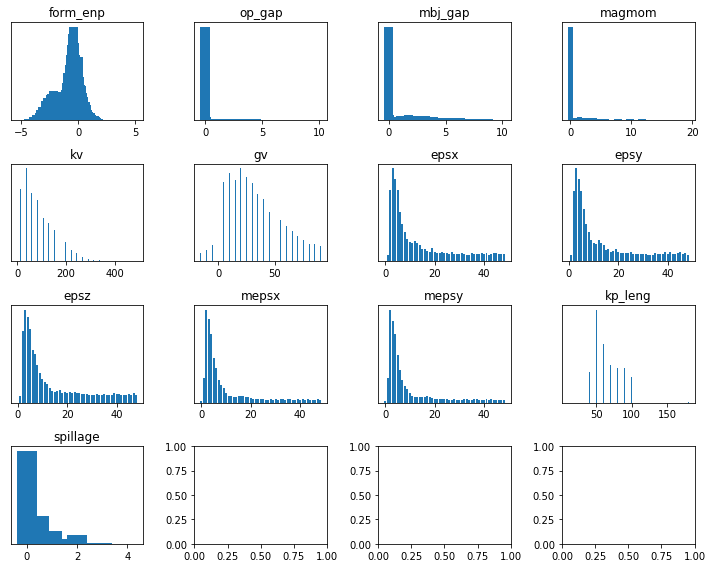

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

# Define figure
fig, ax = plt.subplots(figsize=(10,8),nrows=4, ncols=4)

# Specify plot properties per data key
#      datakey:    plotcoord, interval, [min, max]
props={'form_enp': [ax[0, 0], .1, [-5, 5]],
       'op_gap':   [ax[0, 1], .1, [0, 10]],
       'mbj_gap':  [ax[0, 2], .1, [0, 10]],
       'magmom':   [ax[0, 3], .5, [0, 20]],
       'kv':       [ax[1, 0],  5, [-2, 500]],
       'gv':       [ax[1, 1],  5, [-15, 100]],
       'epsx':     [ax[1, 2],  1, [0, 50]],
       'epsy':     [ax[1, 3],  1, [0, 50]],
       'epsz':     [ax[2, 0],  1, [0, 50]],
       'mepsx':    [ax[2, 1],  1, [0, 50]],
       'mepsy':    [ax[2, 2],  1, [0, 50]],
       'kp_leng':  [ax[2, 3], 10, [10, 200]],
       'spillage': [ax[3 ,1], .5, [0, 5]],
       'spillage': [ax[3, 0], .5, [0, 5]]}

# Build dictionary of value lists
info = {}
for dataset in dat_3d:
    for key in props.keys():
    
        # Append non-empty values
        if dataset[key] != 'na' and dataset[key] != {} :
            if key == 'magmom':
                val = dataset['magmom']['magmom_osz']
            elif not math.isinf(dataset[key]):
                val = dataset[key]
            info.setdefault(key, []).append(val)

for key, values in info.items():
    # Get subplot settings from prop
    max_val = props[key][2][1]
    min_val = props[key][2][0]
    interval = props[key][1]
  
    # Create subplot
    hist, bins = np.histogram(values, 
                            bins = np.arange(min_val, max_val , interval),
                            density = False)
    # Adjust subplot
    ax = props[key][0]
    ax.bar(bins[:-1], hist)
    ax.set_title(key)
    ax.set_yticks([])

plt.tight_layout()

## Conventional DFT methods are known to underestimate bandgaps. However, meta-GGAs such as TBmBJ can alleviate this problem to quite some extent. Let's compare Optb88vdW (example of conventional DFT) and TBmBJ (metaGGA DFT). TBmBJ values are generally closer to experiments.

Text(0, 0.5, 'OptB88vdW bandgap (eV)')

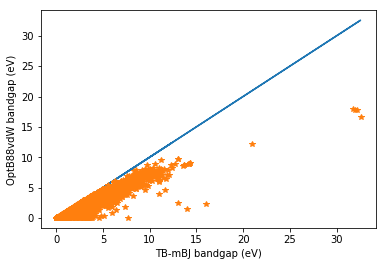

In [12]:
# Define figure
fig, ax = plt.subplots()

mbj=[]
opt=[]
for dataset in dat_3d:
    # Get gap values when a dataset has values for both functionals
    if dataset['op_gap'] != 'na' and dataset['mbj_gap'] != 'na':
        opt.append(dataset['op_gap'])
        mbj.append(dataset['mbj_gap'])

# Plot gap values from the two functional versus each other
plt.plot(mbj, mbj)
plt.plot(mbj, opt, '*')
plt.xlabel('TB-mBJ bandgap (eV)')
plt.ylabel('OptB88vdW bandgap (eV)')

## Example of getting elastic tensor object for a materials. From the elastic tensor, bulk, shear modulus, Poisson's ratio, velocity of sound in the material, lower limit of thermal conductivity, Debye temperature etc. can be computed.


In [13]:
elast = np.array(dat_3d[1]['elastic'].split(','), dtype='float')
cij = elast.reshape(6,6)
print(elast)

[68.  18.6  8.8  0.   0.   0.  18.6 68.   8.8  0.   0.   0.   8.8  8.8
 28.8  0.   0.   0.   0.   0.   0.  24.7  0.   0.   0.   0.   0.   0.
  7.9  0.   0.   0.   0.   0.   0.   7.9]


In [14]:
from pymatgen.analysis.elasticity.elastic import ElasticTensor

def get_et(elast_str=''):
    """
    Converts the 'elastic' JARVIS string to a pymatgen ElasticTensor object 
    """
    # Split string and assign to 6x6 array
    cij = np.empty((6, 6), dtype=float)
    elast = np.array(elast_str.split(','), dtype='float')
    count = 0
    for ii in range(6):
        for jj in range(6):
            cij[ii][jj] = elast[count]
            count = count + 1
    
    # Build ElasticTensor object
    et = ElasticTensor.from_voigt(cij)
    return et
  
# Extract elastic tensor from the first dataset containing 'elastic' values
for dataset in dat_3d:
    if dataset['elastic'] != 'na':
        el_tens = get_et(dataset['elastic'])
        break
    
# Print computed properties and structure info
print ("Poisson's ratio =", el_tens.homogeneous_poisson)
print ('Universal anisotropy =', el_tens.universal_anisotropy)
print (dataset['jid'], dataset['mpid'],
       dataset['final_str'].composition.reduced_formula)

Poisson's ratio = 0.2468881595731997
Universal anisotropy = 1.9263993609180625
JVASP-4666 mp-10009 GaTe


### Exercise 3: plot density and log(density) vs Bulk modulus for 3D materials

In [15]:

"""
density_values =[]
log_density_values =[]
kv_values = []
for i in dat_3d:
  if i['kv']!='na' and i['kv']>-2 and i['kv']<500:
    kv_values.append(i['kv'])
    density = i['final_str'].density
    density_values.append(density)
    log_density_values.append(np.log(density))
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(density_values,kv_values,'.')
plt.xlabel('Density (g/cm3)')
plt.ylabel('Kv(GPa)')
                            
                              
"""

"\ndensity_values =[]\nlog_density_values =[]\nkv_values = []\nfor i in dat_3d:\n  if i['kv']!='na' and i['kv']>-2 and i['kv']<500:\n    kv_values.append(i['kv'])\n    density = i['final_str'].density\n    density_values.append(density)\n    log_density_values.append(np.log(density))\n%matplotlib inline\nimport matplotlib.pyplot as plt\nplt.plot(density_values,kv_values,'.')\nplt.xlabel('Density (g/cm3)')\nplt.ylabel('Kv(GPa)')\n                            \n                              \n"

## Pandas dataframe are helpful in analyzing datasets. Here's let's create some variables, and then assign the values from the 2D dataset. Each JARVIS-ID (jid) generally correponds to a webpage, hence we can make URL links easily from it.

In [0]:
# Convert 2D data to DataFrame (automatically recognizes list of dict)
df = pd.DataFrame(dat_2d)

In [17]:
df.columns

Index(['elastic', 'epsx', 'epsy', 'epsz', 'exfoliation_en', 'fin_en',
       'final_str', 'form_enp', 'incar', 'initial_str', 'jid', 'kpoints',
       'magmom', 'mbj_gap', 'mepsx', 'mepsy', 'mepsz', 'mpid', 'op_gap',
       'phi'],
      dtype='object')

In [0]:
# Define function for getting the OSZICAR magmom value
def get_magmom(magmom_dict):
    if magmom_dict != {}:
        return magmom_dict['magmom_osz']
    else:
        return 'na'

# Apply get_magmom to each magmom value
df['magmom_osz'] = df['magmom'].apply(get_magmom)

In [0]:
# Chemical formula of a structure
def formula(final_str):
  return final_str.composition.reduced_formula

# Apply formula to all final_str object
df['formula'] = df['final_str'].apply(formula)

In [0]:
# Define function for building url link
def build_url(jid):
    return f'https://www.ctcms.nist.gov/~knc6/jsmol/{jid}.html'

# Apply build_url to each jid value
df['url'] = df['jid'].apply(build_url)

In [21]:
# List column keys in df
print(df.keys())

Index(['elastic', 'epsx', 'epsy', 'epsz', 'exfoliation_en', 'fin_en',
       'final_str', 'form_enp', 'incar', 'initial_str', 'jid', 'kpoints',
       'magmom', 'mbj_gap', 'mepsx', 'mepsy', 'mepsz', 'mpid', 'op_gap', 'phi',
       'magmom_osz', 'formula', 'url'],
      dtype='object')


In [0]:
# Specify keys to keep
keys = ['jid', 'formula','op_gap', 'mbj_gap', 'magmom_osz',
        'fin_en', 'exfoliation_en', 'url']

# Specify header names to rename above keys
headers = ['JARVIS_ID', 'Formula','OPT_Gap (eV)', 'MBJ_Gap (eV)', 'Magnetic_moment',
           'Final_Energy', 'Exfoliation_Energy', 'URL']

# Limit by keys and rename to headers
df = df[keys]
df.columns = headers

In [23]:
# Show first few values
df.head()

JARVIS_ID  ...                                                URL
0   JVASP-6838  ...  https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-6...
1    JVASP-646  ...  https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-6...
2  JVASP-19510  ...  https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-1...
3    JVASP-744  ...  https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-7...
4   JVASP-5956  ...  https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-5...

[5 rows x 8 columns]

- - -